In [1]:
#Importaciones
from loadsets import load_sets
from utiles import graficar_sets


#Cargamos los sets
sets = load_sets()

[it_train, it_validation, it_test, it_mtest] = sets

#Graficamos los sets
#graficar_sets(sets)


Train:
Found 1726 images belonging to 10 classes.
Validation:
Found 200 images belonging to 10 classes.
Test:
Found 136 images belonging to 10 classes.
Meta-test:
Found 10 images belonging to 10 classes.


In [2]:
from modelo_sign02 import create_model_sign02
from tensorflow.keras.utils import plot_model

model = create_model_sign02(
        #Filtros para N capas convolucionales (en orden)
        filters = [400, 600, 1200, 1400],
        kernel_sizes = [7, 5, 3, 3],
        activations = ['relu', 'relu', 'relu', 'relu'],
        maxpool = [1,1,1,0],

        #Capas adicionales
        DenseDims = [512, 1024],
        DenseActivations = ['relu', 'relu'],
        DropoutRates = [0.4, 0.2] 
    )


#model.summary()

#plot_model(model, to_file='s01v01.png', show_shapes=True, show_layer_names=True)



 --------- VARIANTE 2 ---------


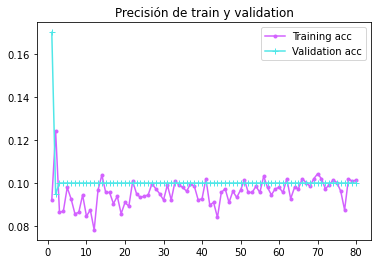

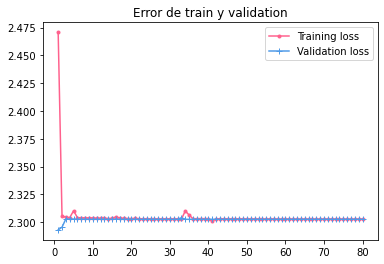


--TEST--
Test accuracy: 7.4%
Test acc:  0.07352941483259201
Test loss:  2.303407669067383

--METATEST--
Meta-Test accuracy: 10.0%
Meta-Test acc: 0.10000000149011612
Meta-Test loss: 2.302626132965088


In [3]:
from tensorflow.keras.optimizers import Adam
from utiles import draw_history

########################################### COMP & FIT ###########################################

histories = list()

#Compilación y Entrenamiento
learning_rate = 0.0001
batch_size = 512
epochs = 80

print("\n\n --------- VARIANTE 2 ---------")

model.compile(
    loss='categorical_crossentropy',
    optimizer= Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

history = model.fit(
    it_train,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True, 
    validation_data=it_validation, 
    verbose=0 
)    

loss_test, acc_test = model.evaluate(
            it_test,
            verbose=0
    ) 

loss_mtest, acc_mtest = model.evaluate(
            it_mtest,
            verbose=0
            ) 
    

draw_history(history)

print("\n--TEST--")  
print("Test accuracy: %.1f%%" % (100.0 * acc_test))  
print("Test acc: ", acc_test)  
print("Test loss: ", loss_test)  
print("\n--METATEST--")  
print("Meta-Test accuracy: %.1f%%" % (100.0 * acc_mtest))  
print("Meta-Test acc:", acc_mtest)  
print("Meta-Test loss:", loss_mtest)  
